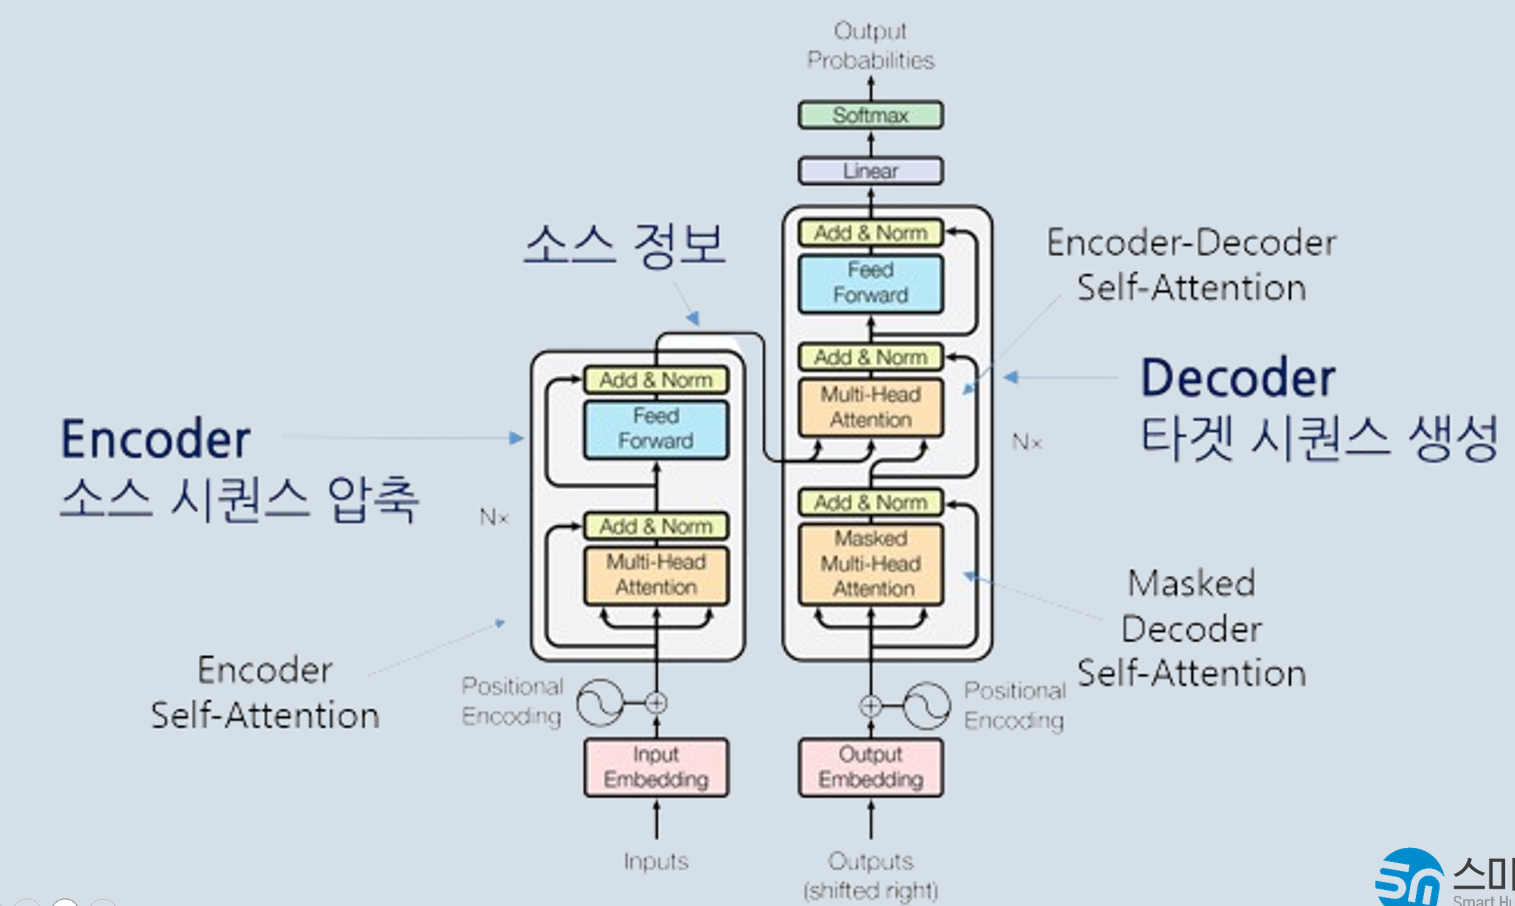

### Transformer 구조
> **Positional Encoding (위치 인코딩)**
> - Self-Attention 기반 모델은 입력 순서를 순차적으로 처리하지 못 함
> - 이에 대해 **<U>토큰 간 순서 정보**</U>를 알려주기 위함 (한 문장을 병렬로 처리하면서도 각 단어의 위치를 인지하게 됨)

> **Encoder Self-Attention**
> - 인코더는 **<U>입력 문장의 모든 단어 간의 관계**</U>를 계산하여, 문장 전체에서 중요한 정보를 파악

> **Add & Norm**
> - 출력에 원래 입력을 **<U>더하고, 값을 정규화**</U>하여 안정된 학습을 도움
> - ResNet - Skip Connection 개념 차용

> **Feed Forward**
> - 활성화 함수(ReLU)를 사용해 입력을 처리해서, 비선형성을 통해 모델이 더 복잡한 패턴을 학습할 수 있게 만드는 **<U>완전 연결 신경망**</U> (쉽게 MLP 떠올리면 됨)

> **Masked Decoder Self-Attention**
> - 디코더가 예측할 때 미래 단어를 **<U>참조하지 못하게 막아**</U>, 이전 단어들만을 사용해 순차적으로 예측

> **Encoder-Decoder Self-Attention**
> - Seq2Seq Attention (Bahdanau/Luong)에서 발전된 형태
> - **<U>디코더가 인코더의 출력을 참조**</U>하여,  입력 문장과의 관계를 기반으로 더 정확한 출력을 생성

## Hugging Face_Transformers
- NLP Task 맛보기
- https://huggingface.co/models

### 트랜스포머 종류

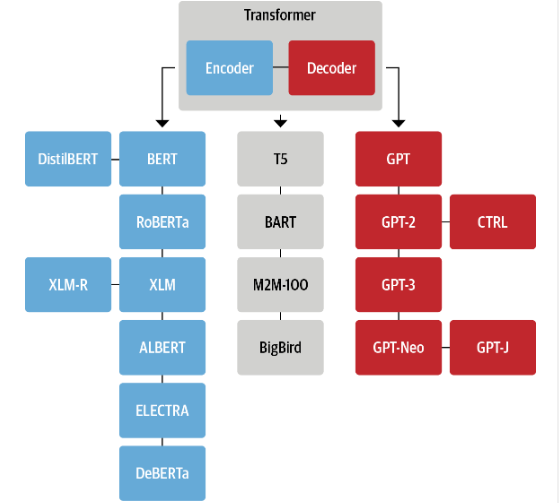

- 넒은 관점에서 3가지로 구분

> BERT 계열
> - 트랜스포머의 인코더 부분을 활용한 모델 (Context Vector를 만들어내는데 특화되어 있는 모델)
> - 대표모델 : BERT, ELECTRA 등
> - 문장 분류, 유사도 계산(SBERT), 감정 분석, 추출적 요약 등

> Seq2Seq 계열
> - 인코더와 디코더가 병합되어 있는 구조
> - 다양한 생성, 이해 등 여러 task에 강점을 가짐 (단점은 연산량이 너무 많음)
> - 대표모델 : T5, BART 등
> - 제로샷 분류, 요약/번역/재작성 등

> GPT 계열
> - 트랜스포머 모델에서 디코더 부분만 활용
> - 입력을 순차적으로 처리 (양방향 X)
> - 대표모델 : GPT
> - 텍스트 생성, 생성적 요약

In [ ]:
!pip -q install transformers[torch]

In [ ]:
from transformers import pipeline
# 허깅페이스에서 제공되는 편의성 함수

### 1. BERT 계열 - 감성분석
- ELECTRA 모델

> MLM : 전체 문장에서 입력으로 들어올 때 일부를 마스킹하고, 해당 마스킹된 단어를 모델의 입력으로 전달해서 예측하는 task

- Generator : 작은 MLM 모델
    - 마스킹되어 있는 위치에 원래 토큰인지, 가짜토큰인지를 예측

- Discriminator : 본모델
    - 이 토큰이 원래 단어인가?를 판별하며 학습

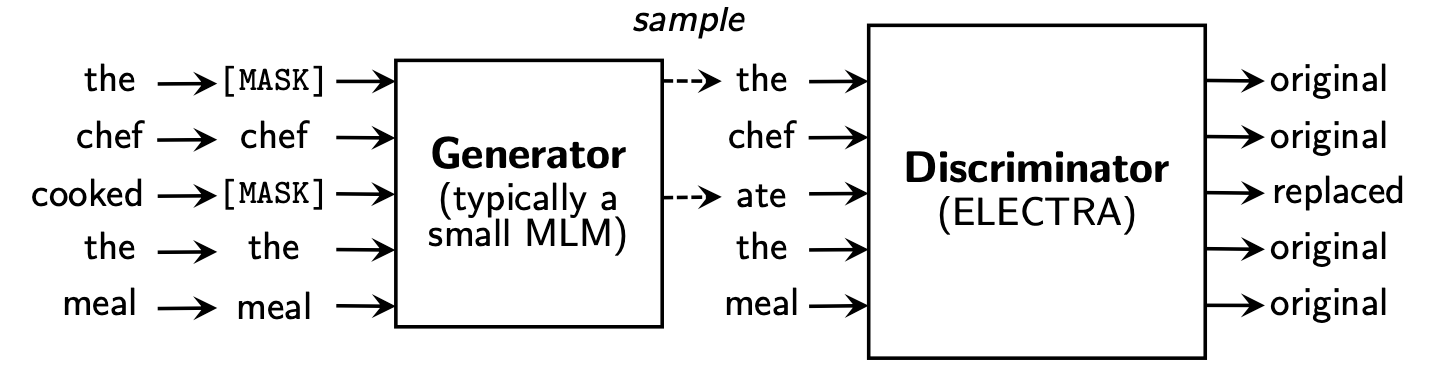

In [ ]:
# 네이버 영화 리뷰 데이터셋으로 FineTuning 되어있는 KoElectra Model
model_name = "daekeun-ml/koelectra-small-v3-nsmc"

In [ ]:
# 허깅페이스에서 모델 로드하기
classifier = pipeline(
    task = "sentiment-analysis",
    model = model_name,
    device = 0 # CPU = -1, GPU = 0
)

### Task 종류

| 파이프라인                      | 설명                                |
| -------------------------- | --------------------------------- |
| `feature-extraction`       | 특징 추출 (텍스트에 대한 벡터 표현 추출)          |
| `fill-mask`                | 마스크 채우기                           |
| `ner`                      | 개체명 인식 (Named Entity Recognition) |
| `question-answering`       | 질의 응답                             |
| `sentiment-analysis`       | 감정 분석                             |
| `summarization`            | 요약                                |
| `text-generation`          | 텍스트 생성                            |
| `translation`              | 번역                                |
| `zero-shot-classification` | 제로샷 분류 (레이블 분류)                   |


In [ ]:
# 예측
classifier("넌 정말 좋은 사람이야")

In [ ]:
classifier(["이 영화 재밌어요", "별로인데?", "자~알 한다"])

### 2. Seq2Seq 계열 - 문장 번역

In [ ]:
ko_to_en = pipeline(task = "translation", model = "Helsinki-NLP/opus-mt-ko-en", device = 0)

In [ ]:
# 사용해보기
ko_to_en("오늘도 보람찬 하루입니다. 내일도 즐거운 마음으로 출근해야지")

In [ ]:
ko_to_en("집에 가고 싶다. 7시 되면 칼퇴근해야지")

### 3. 제로샷 분류
- 사전 훈련 된 NLI(추론 특화) 모델을 이용해서, 새로운 라벨(클래스)을 별도 학습 없이 분류를 수행하는 Task

In [ ]:
classifier = pipeline(task = "zero-shot-classification", model = "joeddav/xlm-roberta-large-xnli", device = 0)

In [ ]:
# 예시 문장(분류할 문장) - 고객 리뷰에 라벨링(어떤 토픽인지)을 해야됌
sequences = [
    "요즘 '폭싹속았수다' 보는 재미로 산다ㅠ 나 보는 거 엄마가 옆에서 보고는 아이유 연기 잘한다고 재밌게 보더니 나 없을 때 정주행하심ㅋㅋ",
    "최근 대선 후보에 대한 논쟁이 뜨겁습니다. 중앙선거관리위원회는 대부분의 후보가 오늘자로 후보자 등록 서류를 제출했다고 밝혔습니다."
]

In [ ]:
# 라벨 목록 정의
labels = ["드라마/영화", "정치", "사회/기술", "경제", "음식", "스포츠"]

In [ ]:
# 제로샷 분류
results = classifier(sequences, labels, multi_label = True) # 다중 라벨 여부

In [ ]:
results[0].keys()

In [ ]:
for re in results :
    print(f"입력문장 : {re['sequence']}")
    print(f"{re['labels'][0]}")
    print(f"{re['scores'][0]}")

- pipeline() : 전처리 + 모델 예측 의 과정을 한번에 처리 가능
- 단점 : 커스터마이징(전이학습, 미세조정) 불가

### 4. 모델 구성요소 로드
- 토크나이저, KoElectra 모델 로드

| 모델 이름                                       | 크기    | 역할            | 설명                                                         |
| ------------------------------------------- | ----- | ------------- | ---------------------------------------------------------- |
| `monologg/koelectra-base-generator`         | Base  | Generator     | 토큰 생성기(generator) 역할 · v3 이전 버전         |
| `monologg/koelectra-base-discriminator`     | Base  | Discriminator | 토큰 판별기(discriminator) 역할 · v1/v2 기본 버전  |
| `monologg/koelectra-base-v3-generator`      | Base  | Generator     | v3 버전 · generator                       |
| `monologg/koelectra-base-v3-discriminator`  | Base  | Discriminator | v3 버전 · discriminator                   |
| `monologg/koelectra-small-generator`        | Small | Generator     | 소형 모델 · generator                       |
| `monologg/koelectra-small-discriminator`    | Small | Discriminator | 소형 모델 · discriminator                   |
| `monologg/koelectra-small-v3-generator`     | Small | Generator     | v3 소형 버전 · generator (NSMC 감성분석 등에 활용 가능)                  |
| `monologg/koelectra-small-v3-discriminator` | Small | Discriminator | v3 소형 버전 · discriminator (감정분석, 문장분류 등)                    |
| `monologg/koelectra-small-v3-goemotions`    | Small | Discriminator | v3 소형 버전 · GoEmotions 감정분류용 (영문 감정 레이블 매핑)                 |
| `monologg/koelectra-base-v3-naver-ner`      | Base  | Discriminator | v3 버전 · Naver NER(개체명 인식)용 fine-tuned 모델                   |
| `monologg/koelectra-base-v3-gender-bias`    | Base  | Discriminator | v3 버전 · 성별 편향 분석용 (gender-bias) 모델                         |

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="monologg/koelectra-small-finetuned-nsmc")

In [ ]:
pipe("힘들고 지칠 때마다 한번씩 외치세요! 학씨~")

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# AutoTokenizer : 다양한 사전학습 토크나이저(전처리 도구)를 자동으로 로드해주는 클래스
# AutoModelFor~~ : 시퀀스 분류용 모델(가중치)을 로드하는 클래스

tokenizer = AutoTokenizer.from_pretrained("monologg/koelectra-small-finetuned-nsmc")
model = AutoModelForSequenceClassification.from_pretrained("monologg/koelectra-small-finetuned-nsmc")

In [ ]:
# 문장 인코딩(입력용 텐서로 변환)
encoded = tokenizer(sequences, padding = True, truncation = True, return_tensors = "pt")

In [ ]:
encoded["input_ids"]
# 정수 시퀀스로 변환한 결괏값

In [ ]:
encoded["token_type_ids"]
# 세그먼트 구분자 (하나의 문서에서 문장을 구분짓는걸 알려주는 용도)

In [ ]:
encoded["attention_mask"]
# 0이면 패딩 토큰, 1이면 실제값

In [ ]:
encoded["input_ids"][0]

In [ ]:
# 토큰 목록 확인
tokens = tokenizer.convert_ids_to_tokens(encoded["input_ids"][0])
tokens

# 대부분의 HuggingFace 모델들은 WordPiece 기반 모델
# 문장을 서브워드 조각내서 정수 시퀀스로 바꿔주는 구글 표준 서브워드 토크나이저를 쓰는 모델

In [ ]:
model.config

| 속성                             | 설명                                                        |
| ------------------------------ | --------------------------------------------------------- |
| `model_type`                   | 모델 유형 (`"electra"`)                                       |
| `architectures`                | 로드된 모델 클래스 이름 (`["ElectraForSequenceClassification"]`)    |
| `vocab_size`                   | 어휘 사전 크기 (토크나이저가 사용하는 토큰 개수)                              |
| `embedding_size`               | 임베딩 차원 수 (토큰 임베딩 벡터의 크기)                                  |
| `hidden_size`                  | Transformer 블록 내부 피처 차원 수                                 |
| `num_hidden_layers`            | 인코더(혹은 디코더) 레이어 개수                                        |
| `num_attention_heads`          | 어텐션 헤드 수                                                  |
| `intermediate_size`            | Feed-Forward 네트워크의 은닉층 차원 수                               |
| `hidden_act`                   | 은닉층 활성화 함수 (`"gelu"`)                                     |
| `layer_norm_eps`               | LayerNorm 안정화를 위한 작은 값                                    |
| `position_embedding_type`      | 위치 임베딩 방식 (`"absolute"`)                                  |
| `max_position_embeddings`      | 시퀀스 길이 최대값 (위치 임베딩 개수)                                    |
| `type_vocab_size`              | 세그먼트(토큰 타입) 임베딩 크기                                        |
| `pad_token_id`                 | 패딩 토큰 ID                                                  |
| `use_cache`                    | 디코더에서 이전 키·값 캐싱 사용 여부                                     |
|                                |                                                           |
| **드롭아웃 관련**                    |                                                           |
| `attention_probs_dropout_prob` | 어텐션 확률 드롭아웃 비율                                            |
| `hidden_dropout_prob`          | 은닉층 드롭아웃 비율                                               |
| `classifier_dropout`           | 분류기 헤드 드롭아웃 비율 (여기선 `null` → 기본 `hidden_dropout_prob` 사용) |
|                                |                                                           |
| **레이블 매핑**                     |                                                           |
| `id2label`                     | 예측된 정수 레이블을 문자열로 매핑 (`0→"negative"`, `1→"positive"`)      |
| `label2id`                     | 문자열 레이블을 정수로 매핑 (`"negative"→0`, `"positive"→1`)          |
|                                |                                                           |
| **기타**                         |                                                           |
| `initializer_range`            | 가중치 초기화 시 표준편차                                            |
| `finetuning_task`              | 파인튜닝 목적 태스크 이름 (`"nsmc"`)                                 |
| `torch_dtype`                  | 모델 내부 연산에 사용하는 텐서 자료형 (`"float32"`)                       |
| `transformers_version`         | 이 설정을 만든 Transformers 라이브러리 버전                            |

In [ ]:
# 모델한테 입력 전달
output = model(**encoded)

In [ ]:
output.logits.shape # 각 클래스별로 점수

- 확률값으로 변환

In [ ]:
import torch.nn.functional as F

In [ ]:
pred_label = F.softmax(output.logits, dim = -1)

In [ ]:
model.config.id2label[ pred_label[0].argmax().item() ]